In [50]:
import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install bs4
# !{sys.executable} -m pip install numpy==1.19.3 
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install lxml
# !{sys.executable} -m pip install googletrans
# !{sys.executable} -m pip install langdetect
# !{sys.executable} -m pip install googletrans
import math
import time
from time import sleep
# import googletrans
# from googletrans import Translator
# from langdetect import detect
import string
import numpy
import pandas as pd
import re
# import lxml
from bs4 import BeautifulSoup
from datetime import date, timedelta, datetime
from IPython.core.display import clear_output
from random import randint
from requests import get
from time import sleep
from time import time
start_time = time()

from warnings import warn

In [51]:
# Loading 911 Call Dataset
## For allocation
# data = pd.read_csv("data.csv")

# For reallocation
data = pd.read_csv("alloted.csv")
data = data[:1000]
# Loading Hospital Location Data 
hosp = pd.read_csv("hospital.csv")
hosp1 = pd.DataFrame.copy(hosp,deep = True)
# hosp1

In [52]:
def hs_dist(lat1, lon1, lat2, lon2): 
      
    # distance between latitudes 
    # and longitudes 
    dlat = (lat2 - lat1) * math.pi / 180.0
    dlon = (lon2 - lon1) * math.pi / 180.0
  
    # convert to radians 
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
  
    # apply formulae 
    a = (pow(math.sin(dlat / 2), 2) + 
         pow(math.sin(dlon / 2), 2) * 
             math.cos(lat1) * math.cos(lat2)); 
    rad = 6371
    c = 2 * math.asin(math.sqrt(a)) 
    return rad * c 

In [53]:
# print(type(data.loc[2][3]))

# print(hosp["longitude"].count())


In [54]:
def allot(lat, lon): 
        min_dist = hs_dist(lat, lon, hosp.loc[0][3], hosp.loc[0][4])
        min_index = 1
        for i in range(1,hosp["longitude"].count()):
                dist = hs_dist(lat, lon, hosp.loc[i][3], hosp.loc[i][4])
                if(dist < min_dist):
                        min_dist = dist
                        min_index = i
        return hosp.iloc[min_index], min_dist

In [55]:
data['hospital_name'] = data['hospital_name'].astype(str)
# for i in range(1,data["lat"].count()):
#         alloted_hospital = allot(data.loc[i][0],data.loc[i][1])
#         data.at[i,'hospital_no'] = alloted_hospital[0][0]
#         data.at[i,'hospital_name'] = alloted_hospital[0][1]
#         data.at[i,'hospital_lat'] = alloted_hospital[0][3]
#         data.at[i,'hospital_lon'] = alloted_hospital[0][4]
#         data.at[i,'distance'] = alloted_hospital[1]4h
# hosp1

In [56]:
def reallot(x,y):
    data1 = data
    hosp1 = pd.DataFrame.copy(hosp,deep = True)
    new_row = pd.DataFrame ({'no':35,"name":"New Hospital","address" :"Not Defined","longitude":x1,"latitude":y1,"rounded lat" : x1,"rounded long":y1},index =[1])
    hosp1 = pd.concat([hosp1,new_row]).set_index("no").reset_index()
    # print(hosp.shape,hosp1.shape)
    for i in range(0,999):
        dist = hs_dist(x,y,data.loc[i][0],data.loc[i][1])
        if dist<data.loc[i][14]:
            print("i is")       
            data1[i]['hospital_no'] = hosp1.loc[34][0]
            data1[i]['hospital_name'] = hosp1.loc[34][1]
            data1[i]['hospital_lat'] = hosp1.loc[34][3]
            data1[i]['hospital_lon'] = hosp1.loc[34][4]
            data1[i]['distance'] = dist

    return data1
# hosp1

In [57]:
# alloted_hospital = allot(data.loc[2][0],data.loc[2][1])
# print(alloted_hospital[0][2])
# print(alloted_hospital[1])
# hosp[:35]
# hosp1 = pd.DataFrame.copy(hosp,deep = True)
# new_row = pd.DataFrame ({'no':35,"name":"New Hospital","address" :"Not Defined","longitude":x1,"latitude":y1,"rounded lat" : x1,"rounded long":y1},index =[1])
# hosp1 = pd.concat([hosp1,new_row]).set_index("no").reset_index()
# hosp1


In [58]:
# data.at[3,'lat'] = 0
# data.head(n=5)

In [59]:
# data.to_csv('alloted1.csv')

In [60]:
# round(numpy.random.uniform(30.0,34.0),4),round(numpy.random.uniform(73,78),4)
t1,u1 = 32,75
print(t1,u1)

32 75


In [75]:
iterations =100
x1 = t1
y1 = u1
y1

75

In [76]:
# dm = reallot(y1,x1)
data.shape


(1000, 17)

In [77]:
sum1 =0
sum2 =0
def sin(x):
    return math.sin(x)
def cos(X):
    return math.cos(X)
p1= x1
p2 =y1 
x1 = 0 
y1= 0
tol = 1e-06
it =0
alpha = 0.1
z=[0]
e=[0]

while((abs(p1-x1)>tol) and (abs(p2-y1) >tol) and (it<=iterations)):
    it= it+1
    x1=p1
    y1=p2
    dm = reallot(x1,y1)    
    # print('it has increased')
    for x,y in zip(dm['lat'], dm['long']):
        a = (-1)*(0.5*sin(x-x1)+ (3.14/180)* (sin(x1*3.14/180) *cos(x*3.14/180))*math.pow(sin((y-y1)*3.14/180),2))
        b = (-1)*(0.5*sin(y-y1)*(cos(x1*3.14/180) *cos(x*3.14/180)))
        sum1 +=  a
        sum2 +=  b
    p1 = x1+alpha*(sum1)/1000
    p2 = y1+alpha*(sum2)/1000
    z.append(p1)
    e.append(p2)
    print(it)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


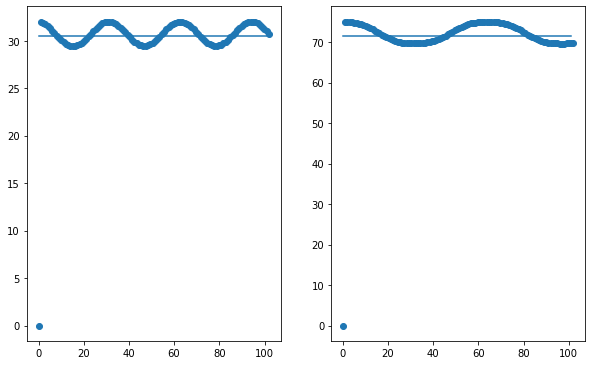

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ie = numpy.linspace(0,102,102)
len(z)
# ie.shape
ax[0].scatter(ie,z)
ax[1].scatter(ie,e)
avg = [sum(z)/len(z)]*len(z)
avg2 = [sum(e)/len(e)]*len(e)
ax[0].plot(avg)
ax[1].plot(avg2)

AttributeError: 'zip' object has no attribute 'dtype'